## Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Read data

In [19]:
df = pd.read_csv('input/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Compute pairwise correlation of columns

<Axes: >

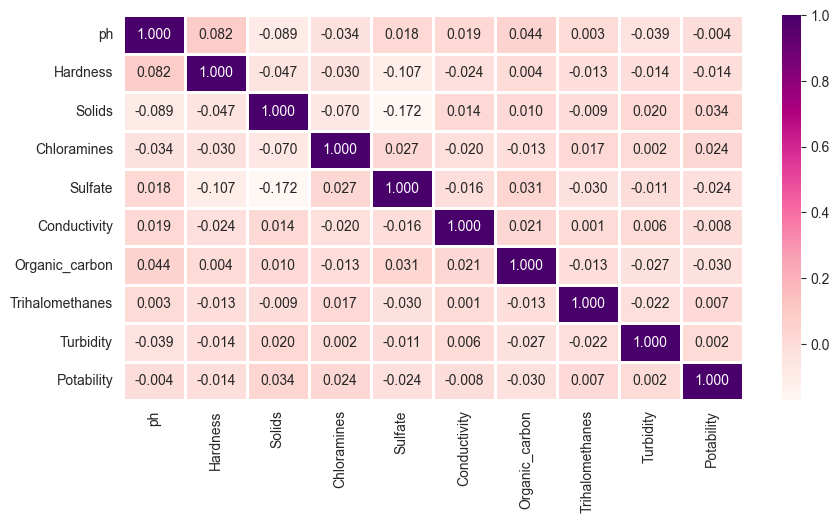

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="RdPu",fmt='.3f',linewidths=.8)

## Count of duplicated values

In [21]:
dup = df.duplicated().sum()
print('Any Duplicate Value:',dup)

Any Duplicate Value: 0


## Count of NaN values

In [22]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Filling NaN objects with mean

In [23]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

## Count of NaN values after filling

In [24]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [25]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Histogram of potability

<Axes: xlabel='Potability', ylabel='Count'>

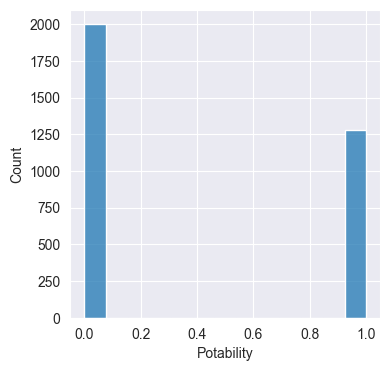

In [26]:
plt.rcParams['figure.figsize'] = [4,4]
sns.histplot(df['Potability'])

## Pairwise relationship in dataset

In [ ]:
sns.pairplot(data = df)

## Split dataset into train and test data

In [ ]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.32, random_state = 50)

In [ ]:
print(x.describe())
print("\n\n")
print(y.describe())

## Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()
# Build a forest of trees from the training set
RFC.fit(x_train,y_train)
# Predict classes
y_RFC = RFC.predict(x_test)

In [ ]:
Acc_rfc = accuracy_score(y_test, y_RFC, normalize=False)
Acc_rfc_norm = accuracy_score(y_test, y_RFC)
print("Predicted:", Acc_rfc, "from", len(y_test))
print(f'Accuracy: {Acc_rfc_norm*100:.2f}%')

In [ ]:
print(classification_report(y_RFC,y_test))